# Modelo de predicción de vacunación para el virus H1N1 y la gripe estacional

Univerisdad de los Andes. MINE-4101: Applied Data Science  

- Andrés Fernando Delgado Pérez
- David Esteban Fajardo Torres
- Jairo Antonio Caro Vanegas
- Lizeth Viviana Perdomo Castañeda

  
**Dataset:** Dataset abierto con los resultados de la Encuesta Nacional sobre la influenza y H1N1 realizada en los Estados Unidos en el 2009. [dataset](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/).

**Business Context:** En el 2009, el virus H1N1 se propagó globalmente, causando entre 151,000 y 575,000 muertes en su primer año. En octubre de ese año, se desarrolló una vacuna para reducir su transmisión mediante la inmunidad colectiva. Entre 2009 y 2010, en EE. UU., se realizó una Encuesta Nacional sobre la Influenza H1N1, que exploró la vacunación contra la gripe H1N1 y estacional, así como datos sociales, económicos, demográficos y actitudes hacia la vacuna. Este análisis podría guiar futuros esfuerzos de salud pública en base a los patrones de vacunación identificados.

In [4]:
## Liberías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency,f_oneway,pearsonr

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
train = pd.read_csv('/content/training_set_features.csv')
vaccine = pd.read_csv('/content/training_set_labels.csv')

In [ ]:
vaccine.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [ ]:
train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Para el análisis de calidad y limpieza de los datos se plantea:
- Validar tipos de datos
- Validar valores nulos/vacíos
- Identificar filas duplicadas
- Dimensión de los datos
- Rango/contenido de las columnas


Para análisis exploratorio se plantea:
- .Describe
- Frecuencias absolutas y relativas
- Gráfica de cada columna (univariado)
- Gráfica relación columnas (multivariado)


In [9]:
#### El dataset no cuenta con registros duplicados
print(train.shape)
duplicate = train.drop_duplicates()
print(duplicate.shape)

(26707, 36)
(26707, 36)


In [10]:
df =pd.merge(train, vaccine, on='respondent_id', how='inner')
df_no_categoric = df.select_dtypes(exclude=['object'])
df_health_worker = df[(df['health_worker'] == 1)]
df_health_worker = df_health_worker.filter(regex = 'behavioral_',axis=1).columns
df_health_worker

Index(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face'],
      dtype='object')

In [ ]:
df['hhs_geo_region']

,hhs_geo_region
0,oxchjgsf
1,bhuqouqj
2,qufhixun
3,lrircsnp
4,qufhixun
...,...
26702,qufhixun
26703,lzgpxyit
26704,lzgpxyit
26705,lrircsnp


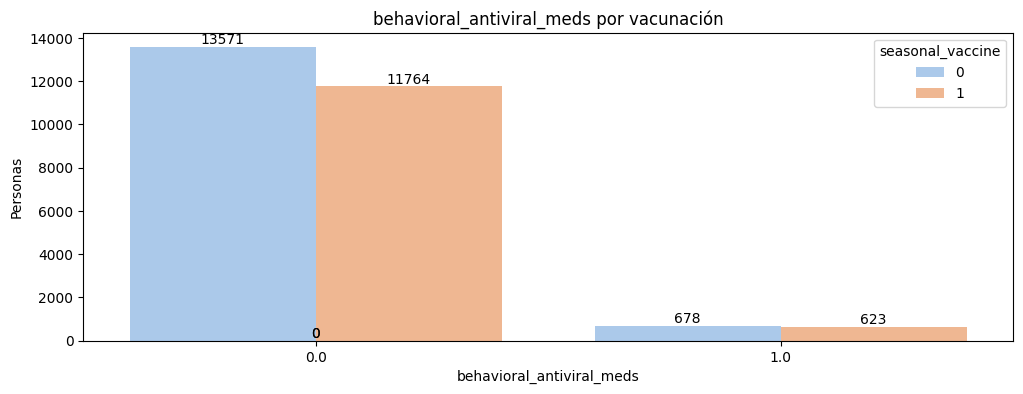

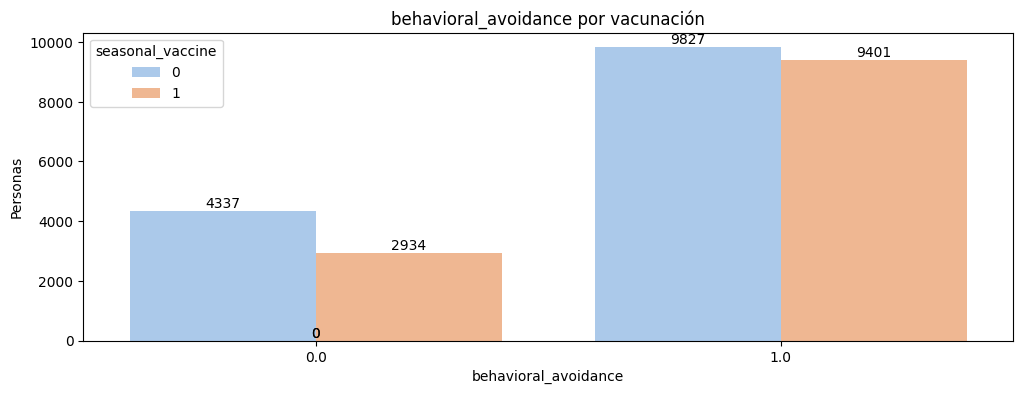

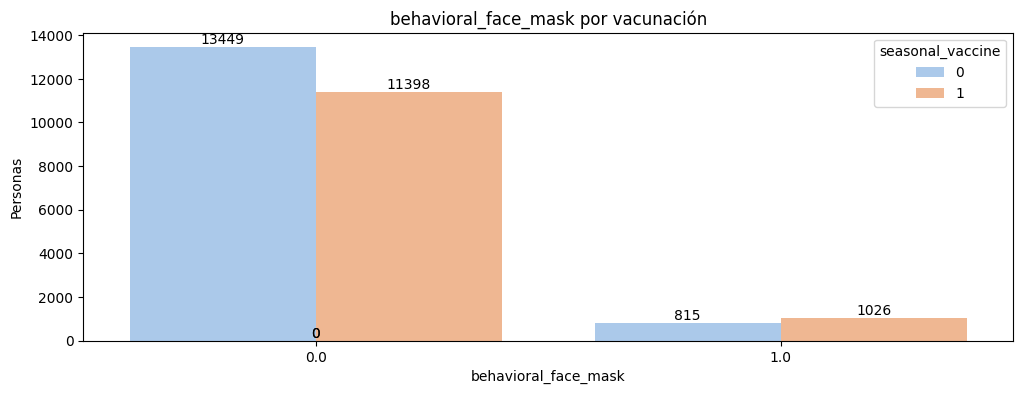

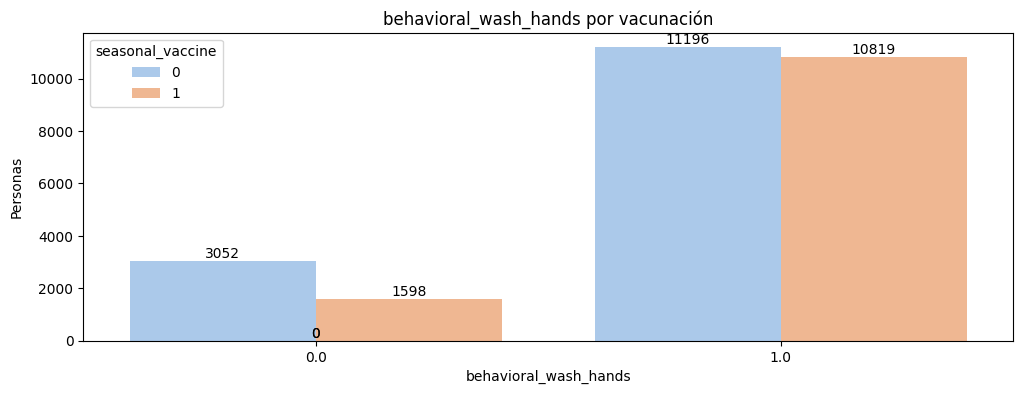

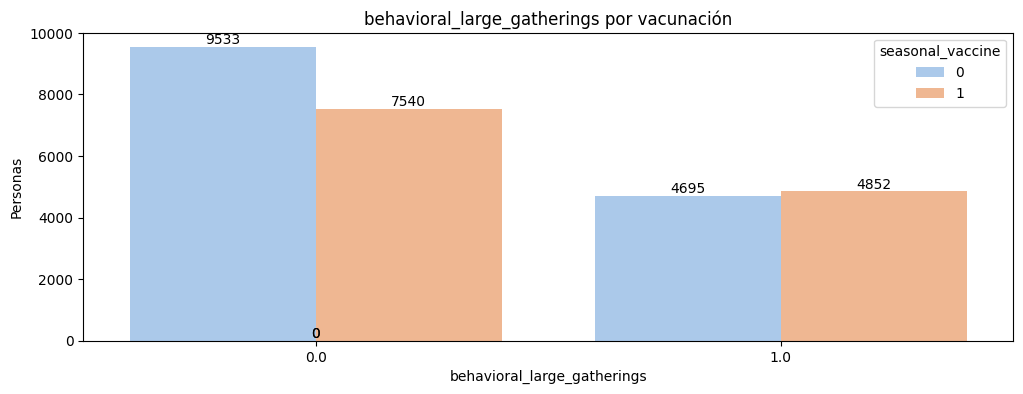

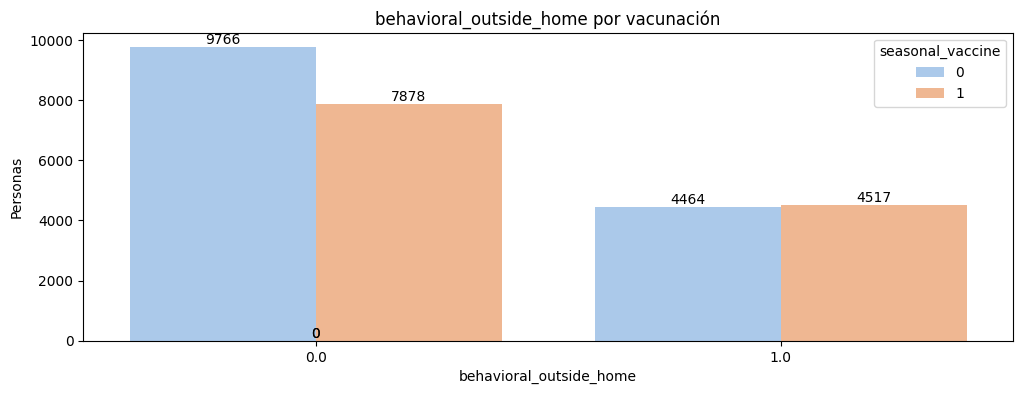

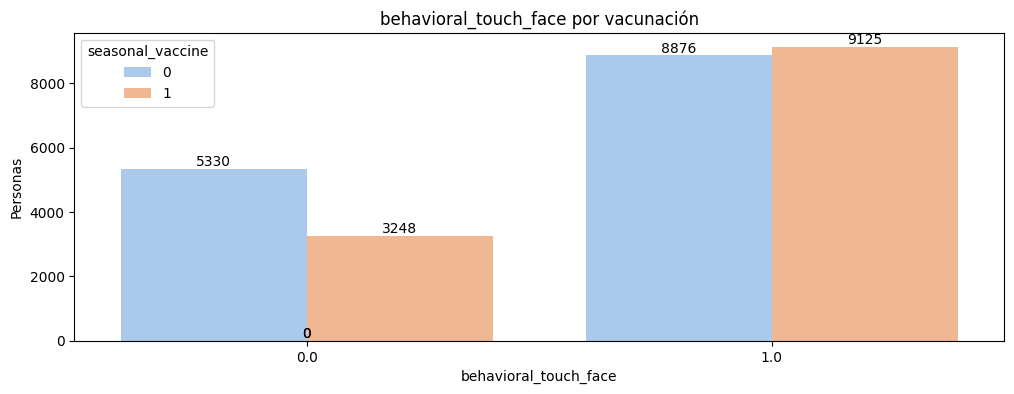

In [62]:
for feature in df_health_worker:
    plt.figure(figsize=(12, 4))
    counts = df.groupby(['seasonal_vaccine', feature]).size().reset_index(name='count')
    ax = sns.barplot(data=counts, x=feature, y='count', hue='seasonal_vaccine', palette='pastel')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    plt.title(f'{feature} por vacunación')
    plt.xlabel(feature)
    plt.ylabel('Personas')
    plt.legend(title='seasonal_vaccine')
    plt.show()

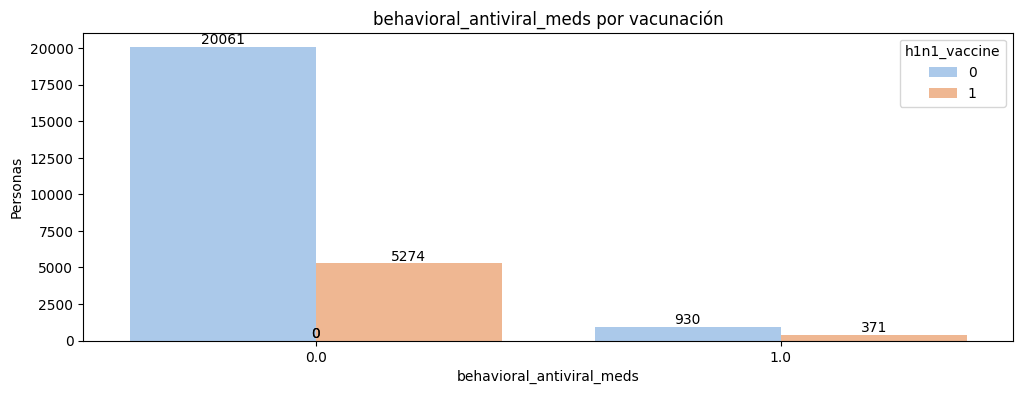

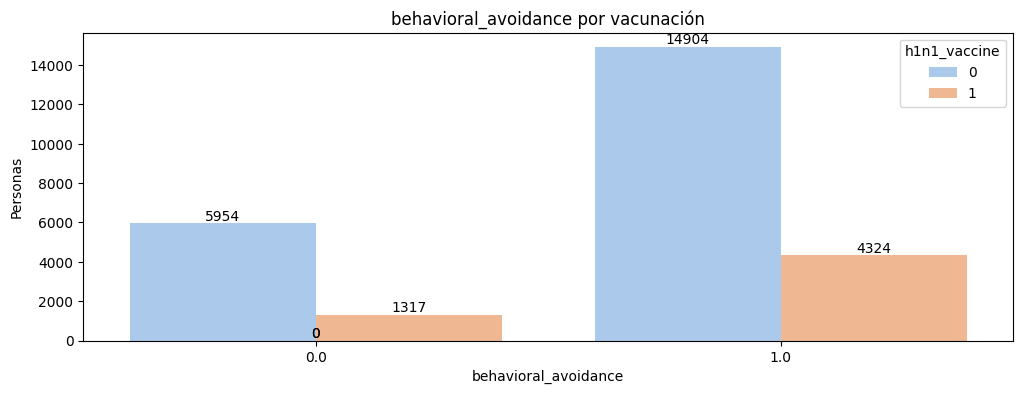

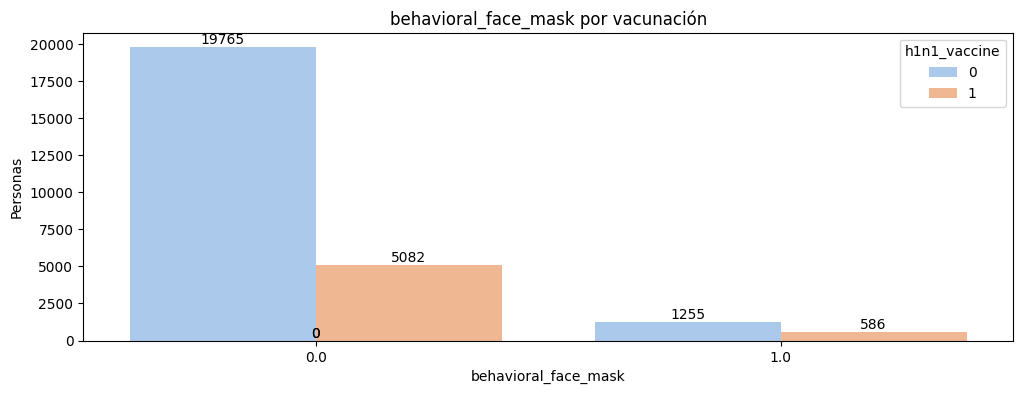

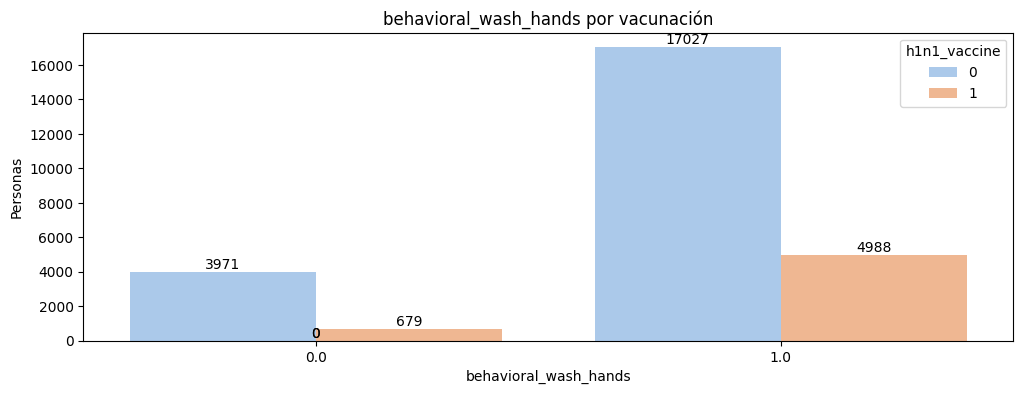

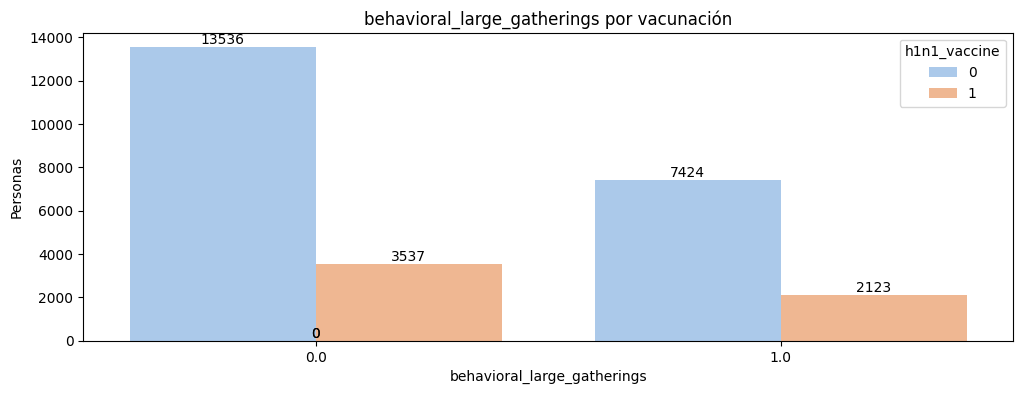

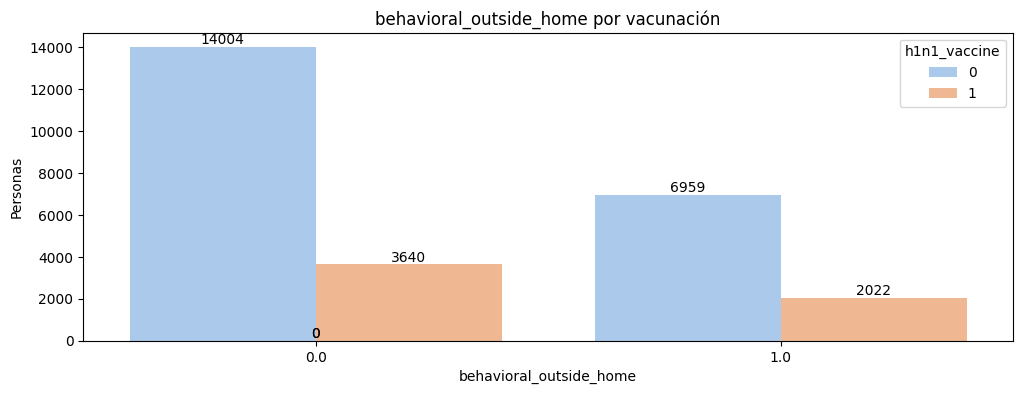

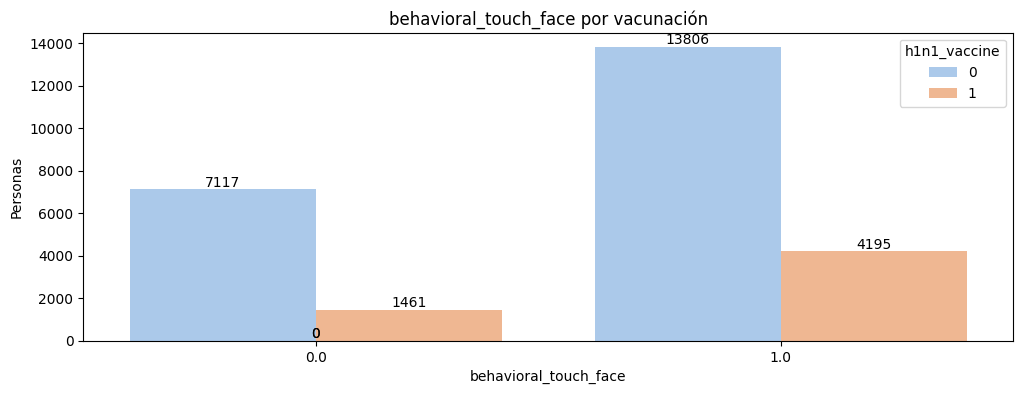

In [61]:
for feature in df_health_worker:
    plt.figure(figsize=(12, 4))
    counts = df.groupby(['h1n1_vaccine', feature]).size().reset_index(name='count')
    ax = sns.barplot(data=counts, x=feature, y='count', hue='h1n1_vaccine', palette='pastel')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    plt.title(f'{feature} por vacunación')
    plt.xlabel(feature)
    plt.ylabel('Personas')
    plt.legend(title='h1n1_vaccine')
    plt.show()

In [7]:
def numero_vacunados(columna, variable, ax=None):
    count = df[[variable, columna]].groupby([variable, columna]).size().unstack(variable)
    count_group = count.sum(axis='columns')
    props = count.div(count_group, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

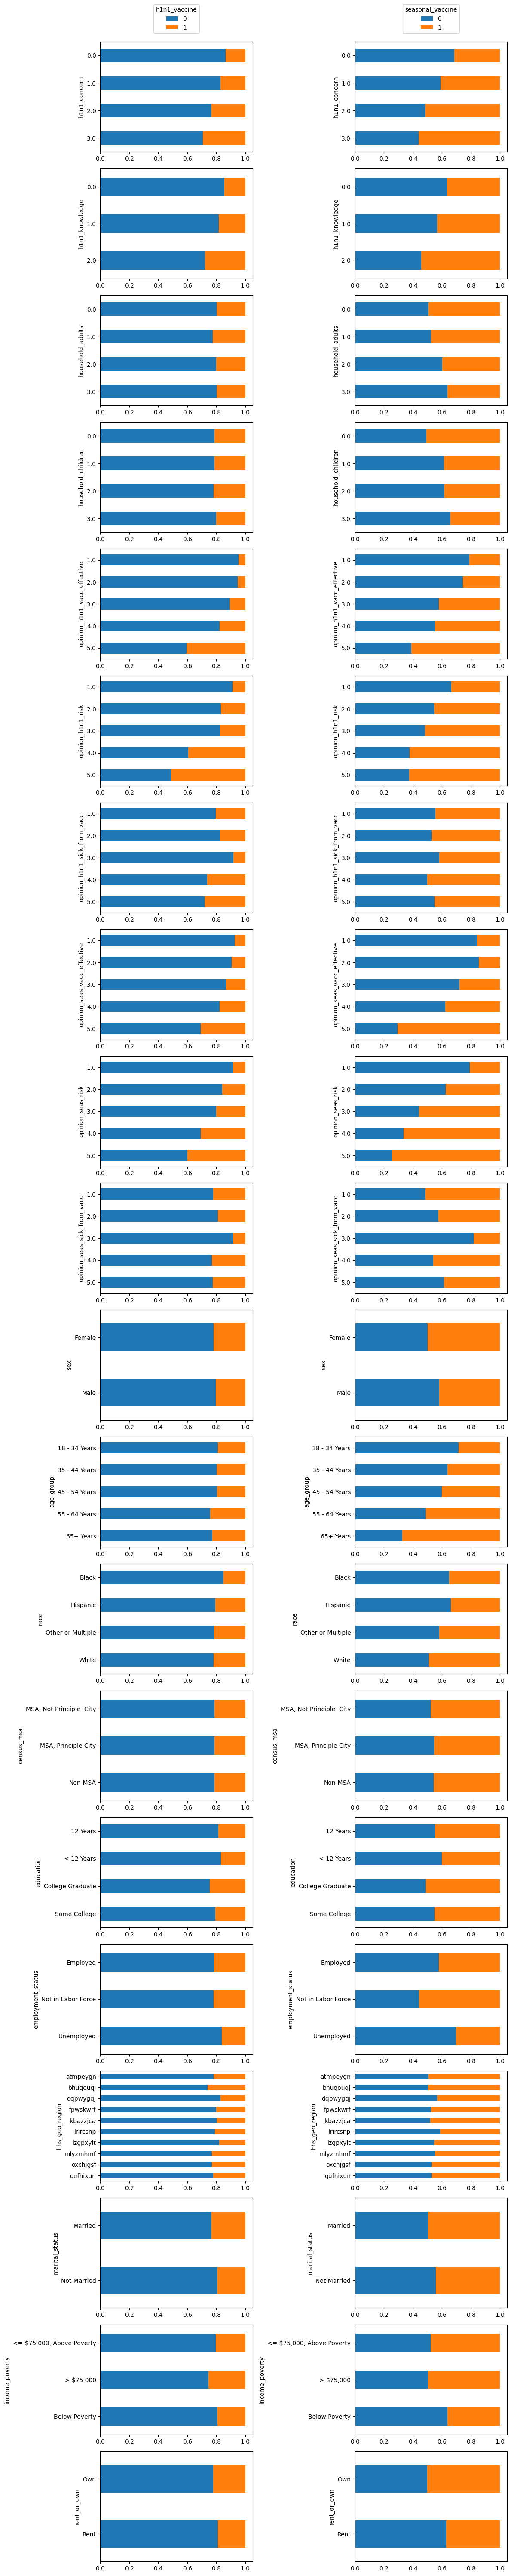

In [11]:
columnas = ['h1n1_concern','h1n1_knowledge','household_adults','household_children','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
                'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','sex','age_group','race','census_msa','education','employment_status',
                'hhs_geo_region','marital_status','income_poverty','rent_or_own']

fig, ax = plt.subplots(len(columnas), 2, figsize=(12,len(columnas)*3))

for i, y in enumerate(columnas):
    numero_vacunados(y, 'h1n1_vaccine', ax=ax[i, 0])
    numero_vacunados(y, 'seasonal_vaccine', ax=ax[i, 1])

ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')

fig.tight_layout()

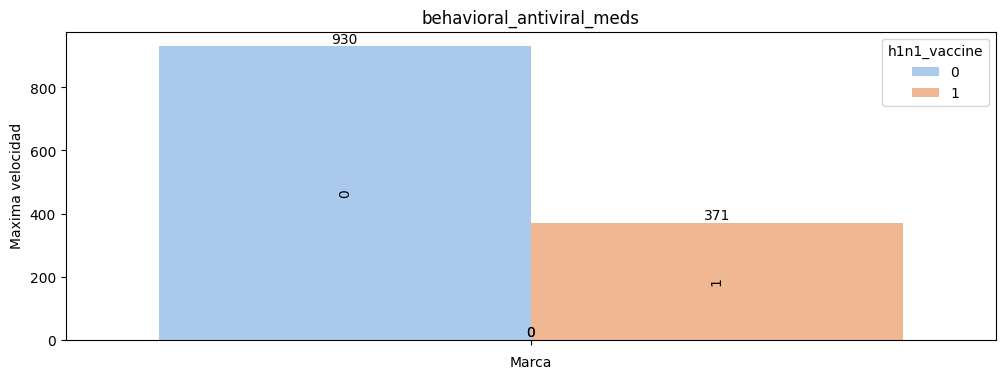

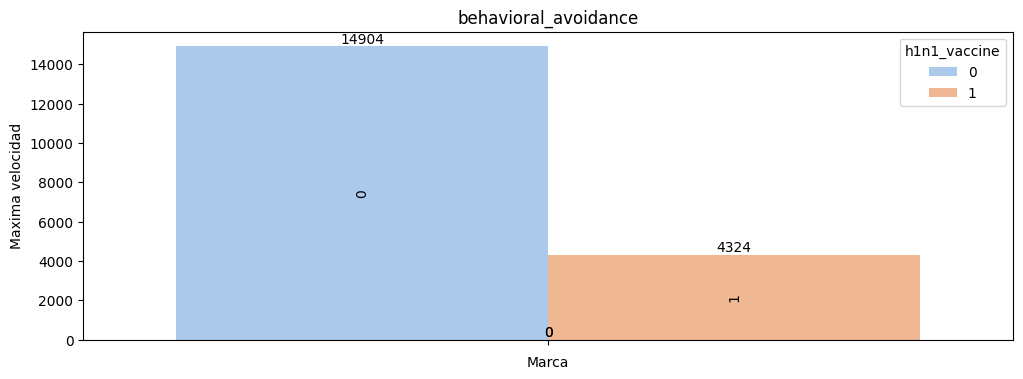

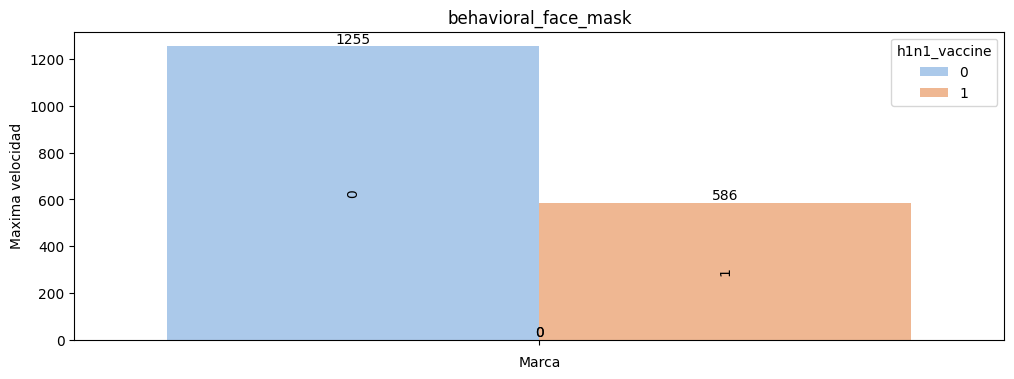

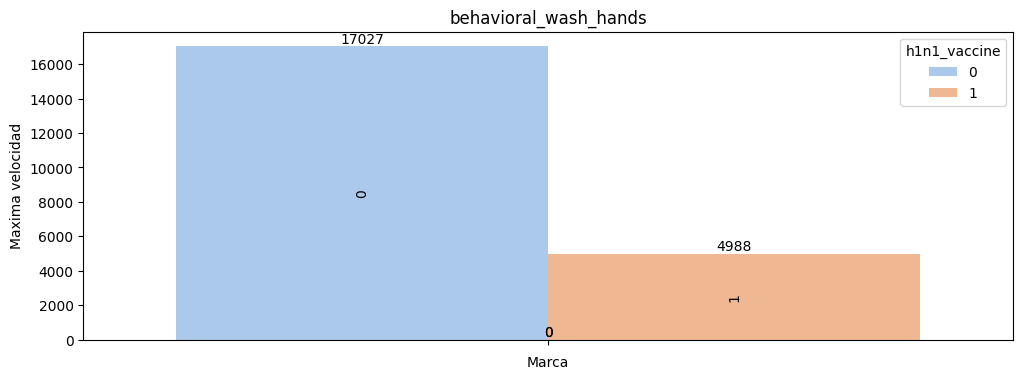

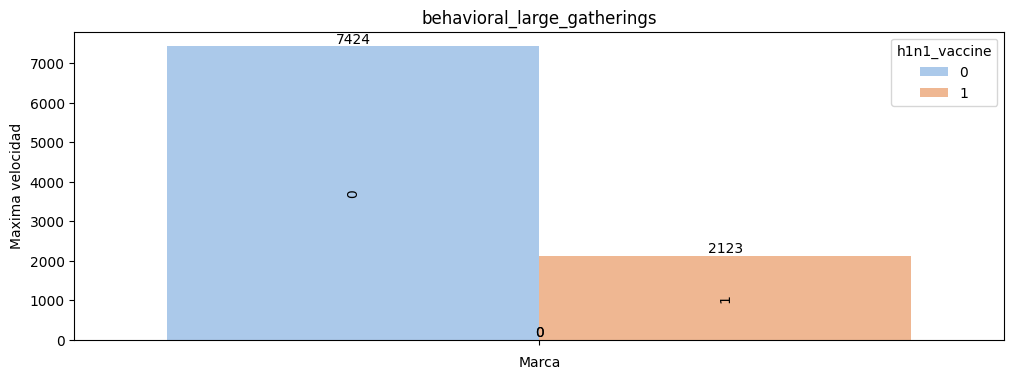

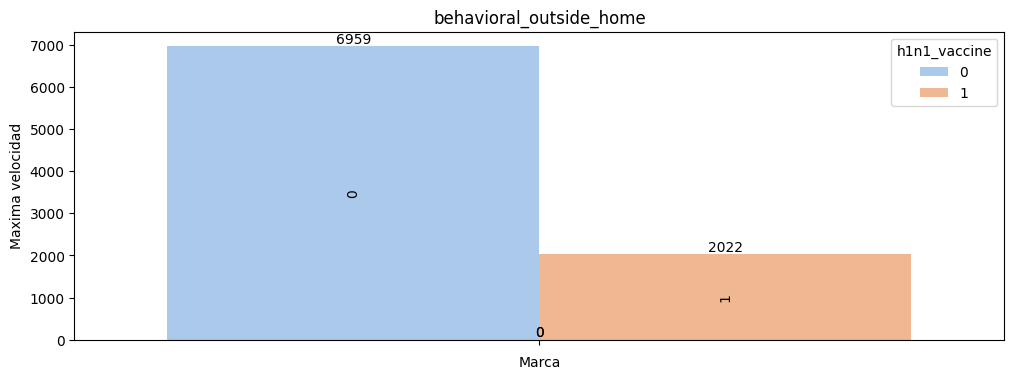

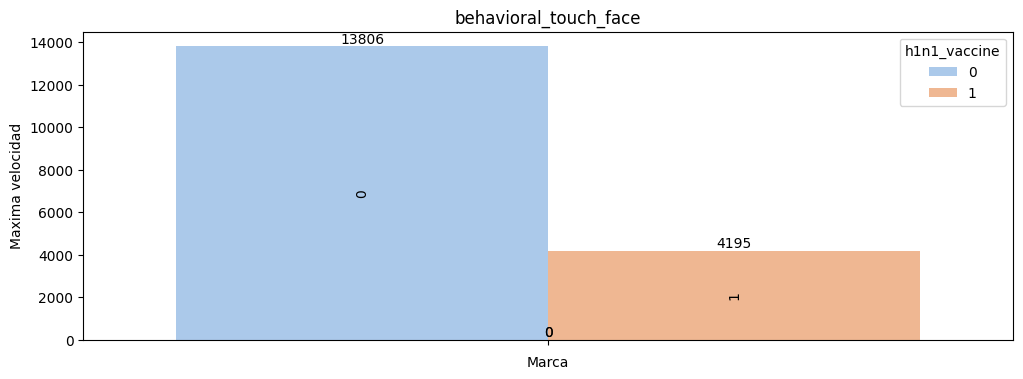

In [12]:
for i in df_health_worker:
  plt.figure(figsize=(12, 4))
  mean_values = df.groupby('h1n1_vaccine')[i].sum().reset_index()
  ax = sns.barplot(data=mean_values, hue='h1n1_vaccine', y=i, palette='pastel')
  for p in ax.patches:
      ax.annotate(f'{int(p.get_height())}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')
  for p, manufacturer in zip(ax.patches, mean_values['h1n1_vaccine']):
      ax.text(p.get_x() + p.get_width() / 2.,
              p.get_height() / 2,
              manufacturer,
              ha='center',
              va='center',
              fontsize=10,
              color='black',
              rotation=90)

  plt.title(i)
  plt.xlabel('Marca')
  plt.ylabel('Maxima velocidad')
  plt.show()

In [13]:
descripcion = df.groupby('age_group').size().reset_index(name='count')
print(descripcion)

       age_group  count
0  18 - 34 Years   5215
1  35 - 44 Years   3848
2  45 - 54 Years   5238
3  55 - 64 Years   5563
4      65+ Years   6843


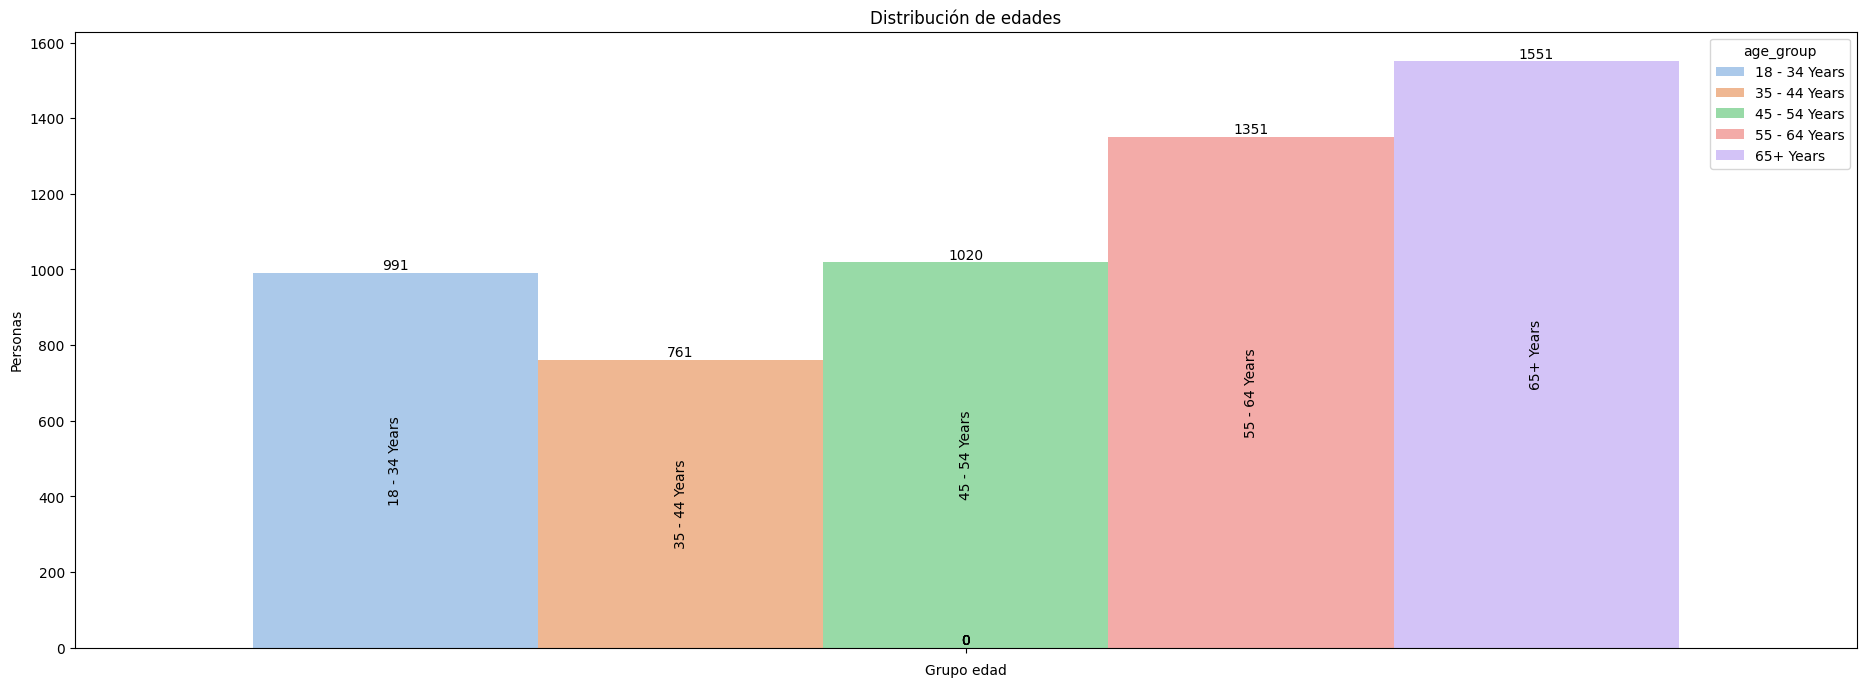

In [14]:
plt.figure(figsize=(23, 8))
mean_values = df.groupby('age_group')['h1n1_vaccine'].sum().reset_index()
ax = sns.barplot(data=mean_values, hue='age_group', y='h1n1_vaccine', palette='pastel')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
for p, manufacturer in zip(ax.patches, mean_values['age_group']):
    ax.text(p.get_x() + p.get_width() / 2.,
             p.get_height() / 2,
             manufacturer,
             ha='center',
             va='center',
             fontsize=10,
             color='black',
             rotation=90)

plt.title('Distribución de edades')
plt.xlabel('Grupo edad')
plt.ylabel('Personas')
plt.show()

No influye en la conclusion

In [15]:
descripcion = df.groupby('chronic_med_condition').size().reset_index(name='count')
print(descripcion)

   chronic_med_condition  count
0                    0.0  18446
1                    1.0   7290


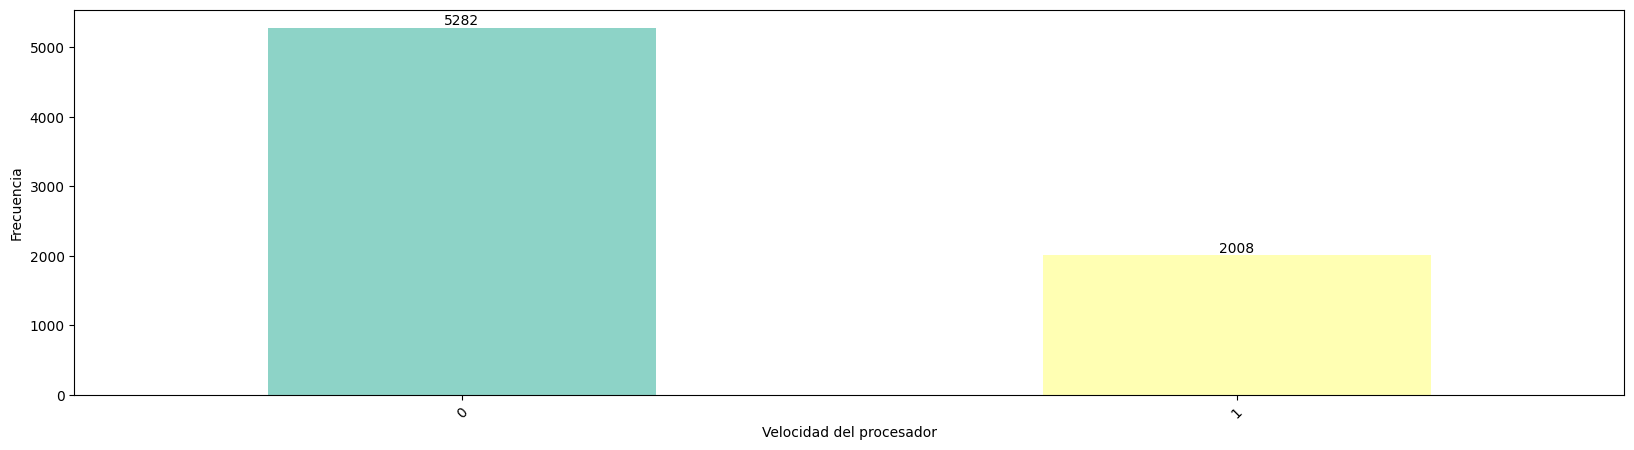

In [16]:
plt.figure(figsize=(20, 5))
ax = df[df['chronic_med_condition'] ==1]['h1n1_vaccine'].value_counts().plot(kind='bar', color=['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.xlabel('Velocidad del procesador')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

No influye el nivel de educion en la personas para validar si obtuvo la vacuna

In [17]:
descripcion = df.groupby('education').agg(average_vaccince = ('h1n1_vaccine', lambda x : x.sum() / x.count())).reset_index()
print(descripcion)

          education  average_vaccince
0          12 Years          0.184751
1        < 12 Years          0.167160
2  College Graduate          0.245915
3      Some College          0.207866


Se nota una tendencia entre la opinion de las personas y si obtuvieron la vacuna o no

In [18]:
descripcion = df.groupby('opinion_h1n1_vacc_effective').agg(average_vaccince = ('h1n1_vaccine', lambda x : x.sum() / x.count())).reset_index()
print(descripcion)

   opinion_h1n1_vacc_effective  average_vaccince
0                          1.0          0.047404
1                          2.0          0.051130
2                          3.0          0.105653
3                          4.0          0.176410
4                          5.0          0.404828


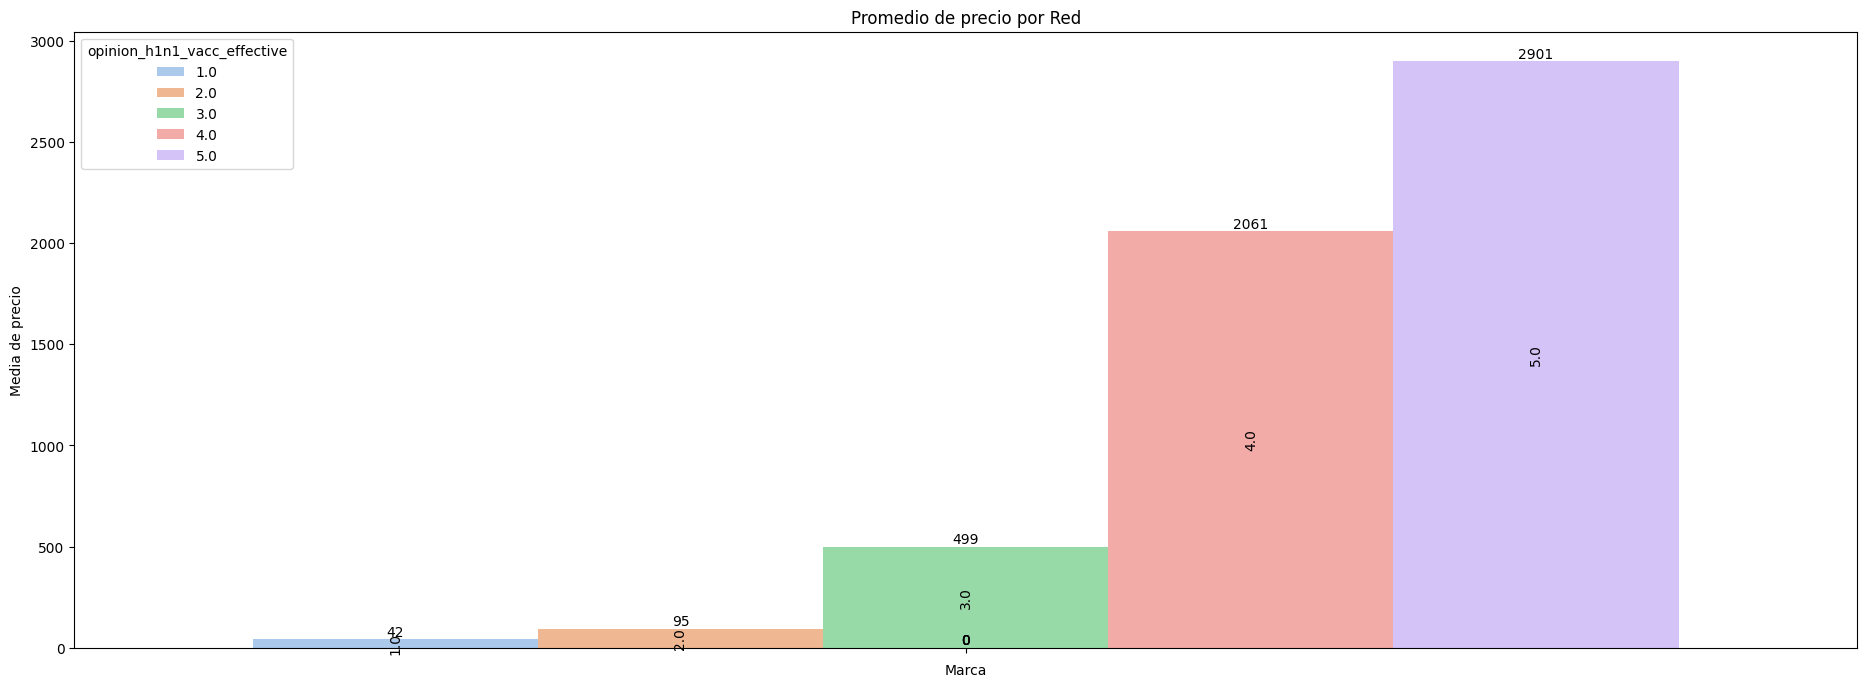

In [19]:
plt.figure(figsize=(23, 8))
mean_values = df.groupby('opinion_h1n1_vacc_effective')['h1n1_vaccine'].sum().reset_index()
ax = sns.barplot(data=mean_values, hue='opinion_h1n1_vacc_effective', y='h1n1_vaccine', palette='pastel')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
for p, manufacturer in zip(ax.patches, mean_values['opinion_h1n1_vacc_effective']):
    ax.text(p.get_x() + p.get_width() / 2.,
             p.get_height() / 2,
             manufacturer,
             ha='center',
             va='center',
             fontsize=10,
             color='black',
             rotation=90)

plt.title('Promedio de precio por Red')
plt.xlabel('Marca')
plt.ylabel('Media de precio')
plt.show()

In [20]:
descripcion = df.groupby('opinion_h1n1_risk').agg(average_vaccince = ('h1n1_vaccine', lambda x : x.sum() / x.count())).reset_index()
print(descripcion)

   opinion_h1n1_risk  average_vaccince
0                1.0          0.088340
1                2.0          0.167960
2                3.0          0.173679
3                4.0          0.392102
4                5.0          0.510857


Va ligado a los trabajadores de la salud

In [ ]:

descripcion = df.groupby('h1n1_knowledge').agg(average_vaccince = ('h1n1_vaccine', lambda x : x.sum() / x.count())).reset_index()
print(descripcion)

   h1n1_knowledge  average_vaccince
0             0.0          0.144054
1             1.0          0.181737
2             2.0          0.278065


Por la cantidad de nulos observados esta columna no se tendra en cuenta

In [ ]:
df['health_insurance'].isnull().sum()

12274

In [ ]:

descripcion = df.groupby('child_under_6_months').agg(average_vaccince = ('h1n1_vaccine', lambda x : x.sum() / x.count())).reset_index()
print(descripcion)

   child_under_6_months  average_vaccince
0                   0.0          0.205272
1                   1.0          0.304958


Porcentaje de personas vacunadas

In [ ]:
print(df[df['h1n1_vaccine'] == 0].shape[0] / df.shape[0],df[df['h1n1_vaccine'] == 1].shape[0] / df.shape[0])


0.7875463361665481 0.2124536638334519


In [ ]:
descripcion = df.groupby('census_msa').agg(average_vaccince = ('h1n1_vaccine', lambda x : x.sum() / x.count())).reset_index()
print(descripcion)

                 census_msa  average_vaccince
0  MSA, Not Principle  City          0.211851
1       MSA, Principle City          0.213759
2                   Non-MSA          0.212003


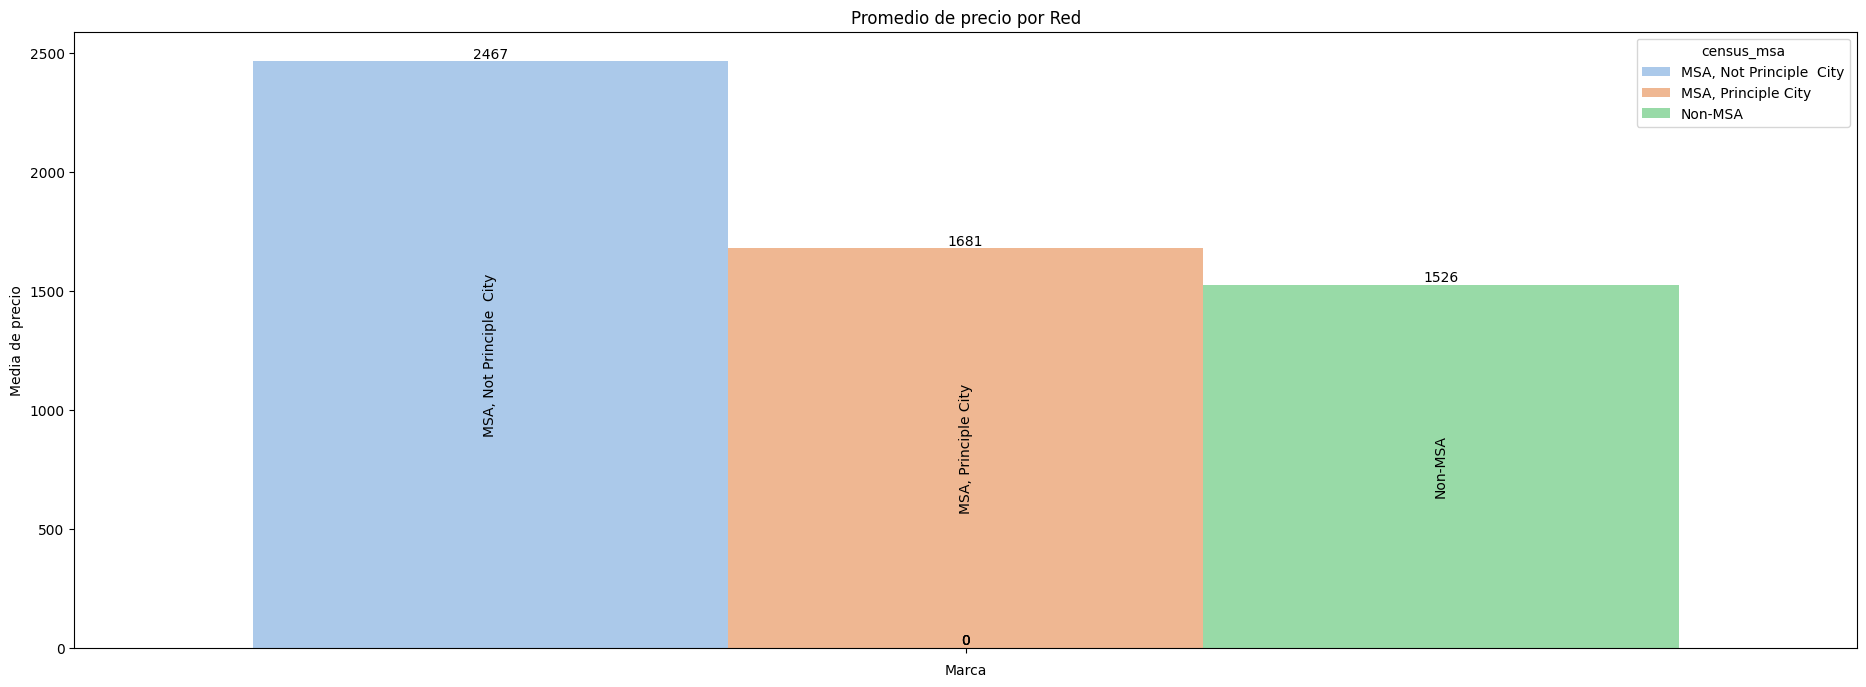

In [ ]:
plt.figure(figsize=(23, 8))
mean_values = df.groupby('census_msa')['h1n1_vaccine'].sum().reset_index()
ax = sns.barplot(data=mean_values, hue='census_msa', y='h1n1_vaccine', palette='pastel')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
for p, manufacturer in zip(ax.patches, mean_values['census_msa']):
    ax.text(p.get_x() + p.get_width() / 2.,
             p.get_height() / 2,
             manufacturer,
             ha='center',
             va='center',
             fontsize=10,
             color='black',
             rotation=90)

plt.title('Promedio de precio por Red')
plt.xlabel('Marca')
plt.ylabel('Media de precio')
plt.show()

In [ ]:
descripcion = df.groupby('employment_status').agg(average_vaccince = ('h1n1_vaccine', lambda x : x.sum() / x.count())).reset_index()
print(descripcion)

    employment_status  average_vaccince
0            Employed          0.215560
1  Not in Labor Force          0.219236
2          Unemployed          0.163111


Tendencia entre las personas desempleadas y con trabajo al momento de recibir vacunas

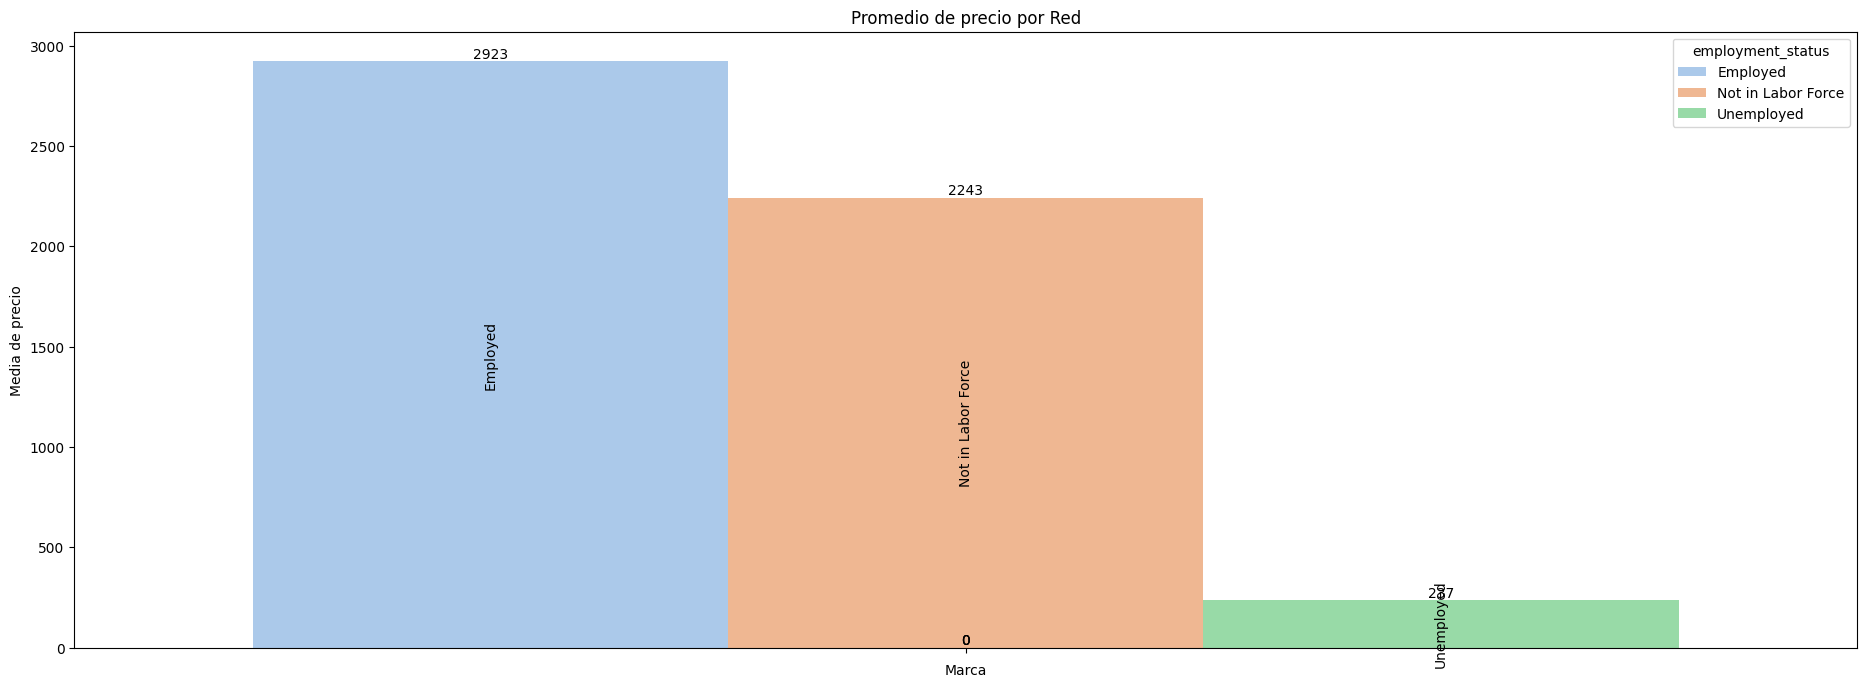

In [ ]:

plt.figure(figsize=(23, 8))
mean_values = df.groupby('employment_status')['h1n1_vaccine'].sum().reset_index()
ax = sns.barplot(data=mean_values, hue='employment_status', y='h1n1_vaccine', palette='pastel')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
for p, manufacturer in zip(ax.patches, mean_values['employment_status']):
    ax.text(p.get_x() + p.get_width() / 2.,
             p.get_height() / 2,
             manufacturer,
             ha='center',
             va='center',
             fontsize=10,
             color='black',
             rotation=90)

plt.title('Promedio de precio por Red')
plt.xlabel('Marca')
plt.ylabel('Media de precio')
plt.show()

# PRUEBAS ESTADÍSTICAS

H1N1

In [27]:
train_p1 = df[df['opinion_h1n1_risk'].notna() & df['h1n1_vaccine'].notna()]
pearson_corr, pearson_p = pearsonr(train_p1['opinion_h1n1_risk'], train_p1['h1n1_vaccine'])
print("Correlación de Pearson:", pearson_corr)
print("Valor p (Pearson):", pearson_p)

Correlación de Pearson: 0.3232646603477824
Valor p (Pearson): 0.0


In [33]:
train_p1 = df[df['opinion_h1n1_vacc_effective'].notna() & df['h1n1_vaccine'].notna()]
pearson_corr, pearson_p = pearsonr(train_p1['opinion_h1n1_vacc_effective'], train_p1['h1n1_vaccine'])
print("Correlación de Pearson:", pearson_corr)
print("Valor p (Pearson):", pearson_p)

Correlación de Pearson: 0.26934700167297687
Valor p (Pearson): 0.0


In [32]:
train_p1 = df[df['opinion_h1n1_sick_from_vacc'].notna() & df['h1n1_vaccine'].notna()]
pearson_corr, pearson_p = pearsonr(train_p1['opinion_h1n1_sick_from_vacc'], train_p1['h1n1_vaccine'])
print("Correlación de Pearson:", pearson_corr)
print("Valor p (Pearson):", pearson_p)

Correlación de Pearson: 0.07509070100682974
Valor p (Pearson): 3.2214513470054865e-34


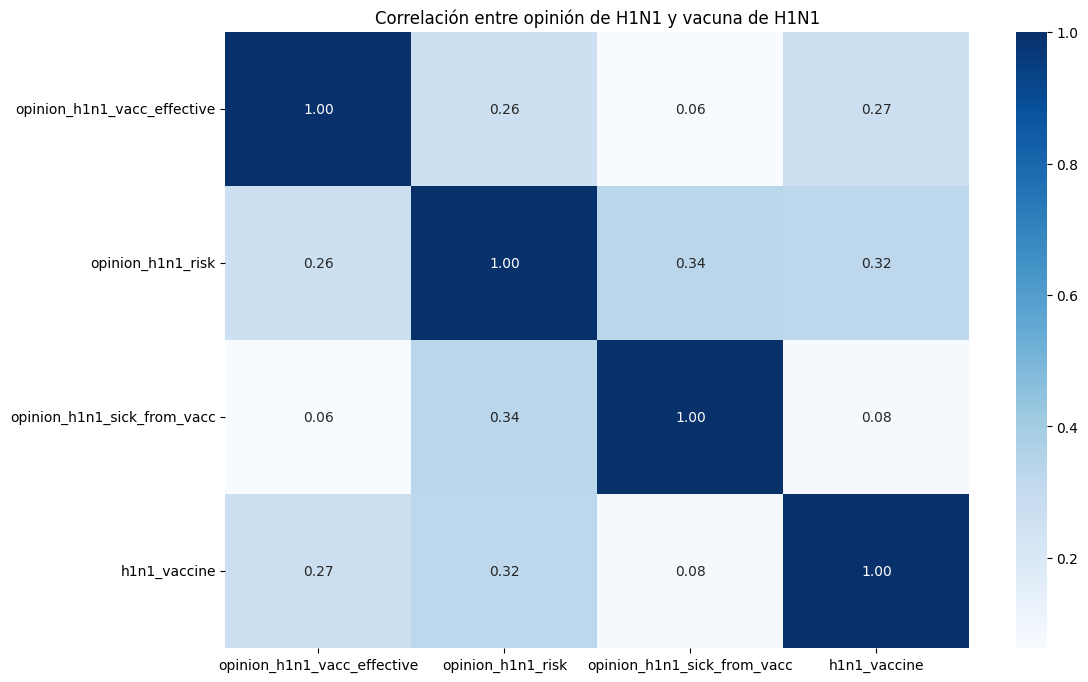

In [47]:
opinion_cols = [col for col in df.columns if 'opinion' in col and 'seas' not in col]
h1n1_cols = opinion_cols + ['h1n1_vaccine']
corr_matrix_h1n1 = df[h1n1_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_h1n1, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlación entre opinión de H1N1 y vacuna de H1N1')
plt.show()

INFLUENZA

In [41]:
train_p1 = df[df['opinion_seas_risk'].notna() & df['seasonal_vaccine'].notna()]
pearson_corr, pearson_p = pearsonr(train_p1['opinion_seas_risk'], train_p1['seasonal_vaccine'])
print("Correlación de Pearson:", pearson_corr)
print("Valor p (Pearson):", pearson_p)

Correlación de Pearson: 0.39010571338475863
Valor p (Pearson): 0.0


In [42]:
train_p1 = df[df['opinion_seas_vacc_effective'].notna() & df['seasonal_vaccine'].notna()]
pearson_corr, pearson_p = pearsonr(train_p1['opinion_seas_vacc_effective'], train_p1['seasonal_vaccine'])
print("Correlación de Pearson:", pearson_corr)
print("Valor p (Pearson):", pearson_p)

Correlación de Pearson: 0.361874727351459
Valor p (Pearson): 0.0


In [43]:
train_p1 = df[df['opinion_seas_sick_from_vacc'].notna() & df['seasonal_vaccine'].notna()]
pearson_corr, pearson_p = pearsonr(train_p1['opinion_seas_sick_from_vacc'], train_p1['seasonal_vaccine'])
print("Correlación de Pearson:", pearson_corr)
print("Valor p (Pearson):", pearson_p)

Correlación de Pearson: -0.061510356149299714
Valor p (Pearson): 2.2904008728230805e-23


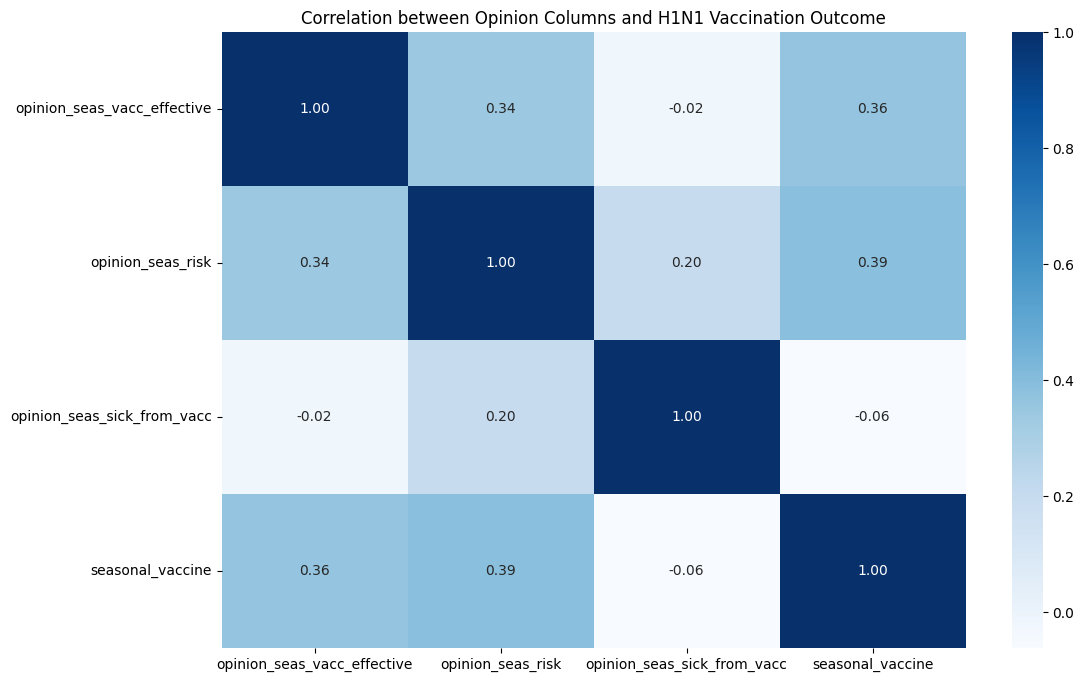

In [44]:
opinion_cols = [col for col in df.columns if 'opinion' in col and 'h1n1' not in col]
h1n1_cols = opinion_cols + ['seasonal_vaccine']
corr_matrix_h1n1 = df[h1n1_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_h1n1, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation between Opinion Columns and H1N1 Vaccination Outcome')
plt.show()

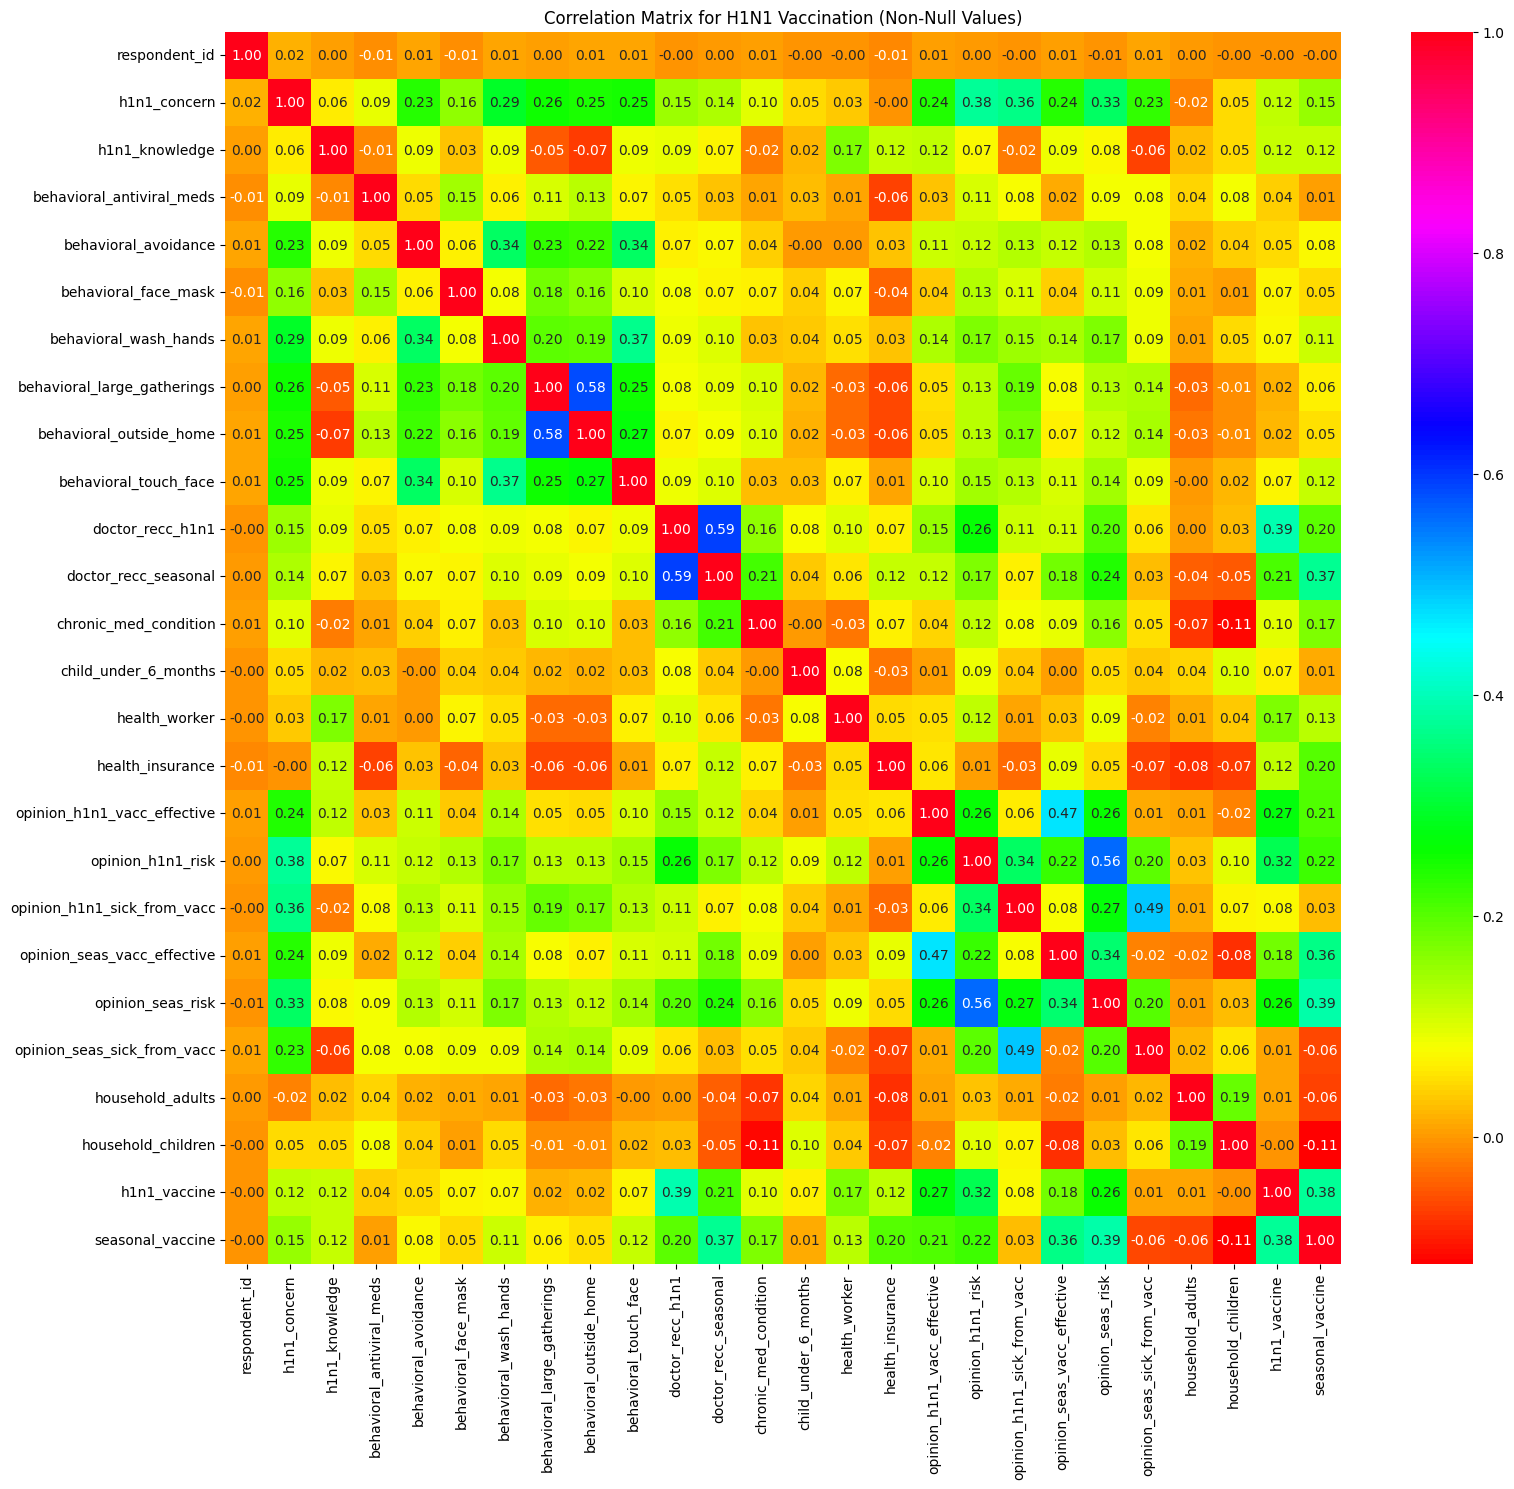

In [50]:
h1n1_df = df[df['h1n1_vaccine'].notna()]
numeric_h1n1_df = h1n1_df.select_dtypes(include=['number'])
corr_matrix_h1n1 = numeric_h1n1_df.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix_h1n1, annot=True, cmap='hsv', fmt=".2f")
plt.title('Correlation Matrix for H1N1 Vaccination (Non-Null Values)')
plt.show()

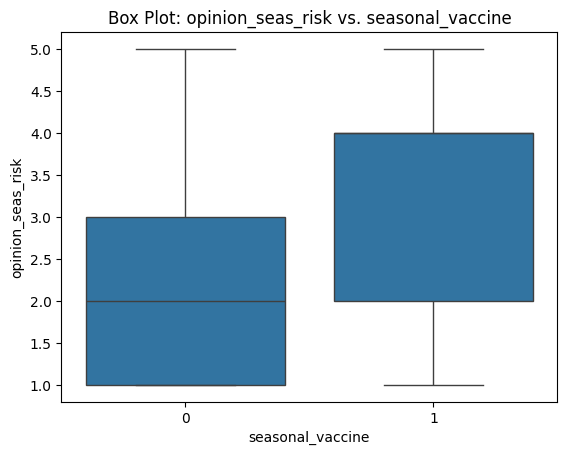

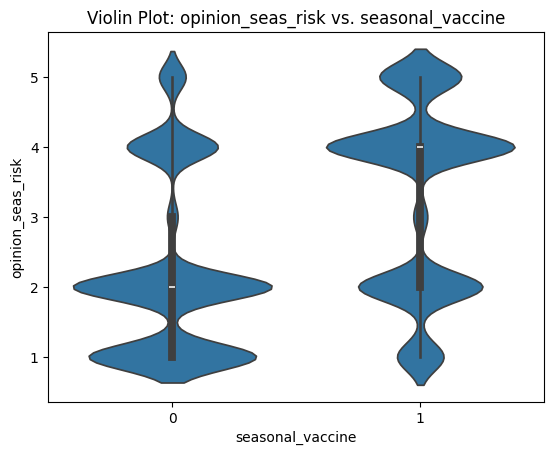

In [57]:
var1 = 'opinion_seas_risk'
var2 = 'seasonal_vaccine'

sns.boxplot(x=var2, y=var1, data=df)
plt.title(f'Box Plot: {var1} vs. {var2}')
plt.show()


sns.violinplot(x=var2, y=var1, data=df)
plt.title(f'Violin Plot: {var1} vs. {var2}')
plt.show()

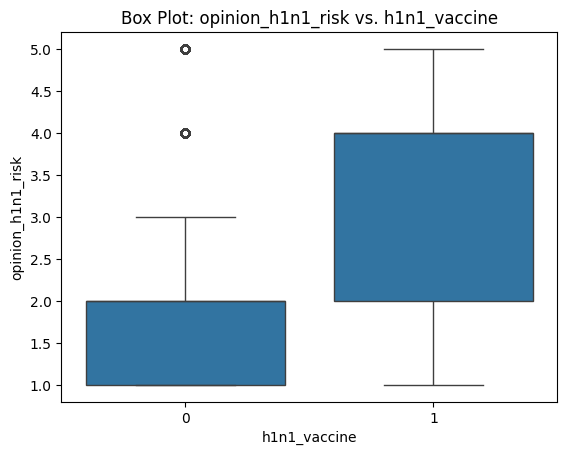

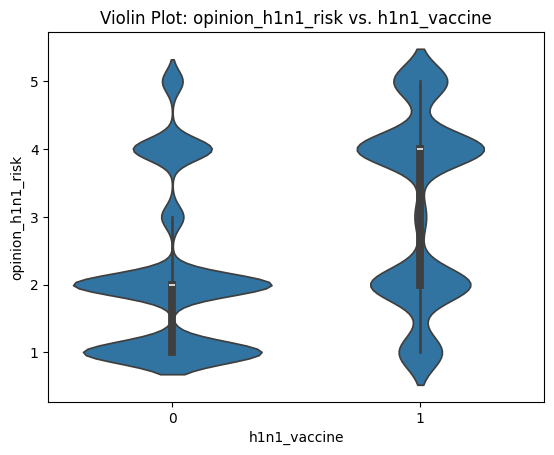

In [55]:
var1 = 'opinion_h1n1_risk'
var2 = 'h1n1_vaccine'

sns.boxplot(x=var2, y=var1, data=df)
plt.title(f'Box Plot: {var1} vs. {var2}')
plt.show()


sns.violinplot(x=var2, y=var1, data=df)
plt.title(f'Violin Plot: {var1} vs. {var2}')
plt.show()

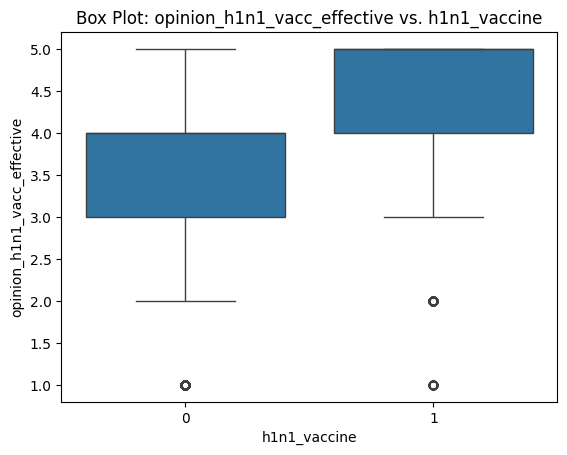

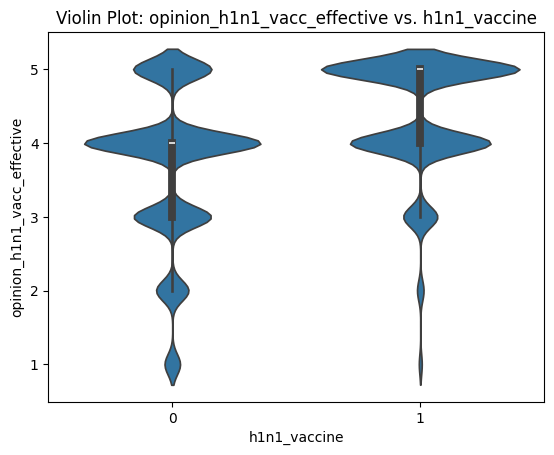

In [58]:
var1 = 'opinion_h1n1_vacc_effective'
var2 = 'h1n1_vaccine'

sns.boxplot(x=var2, y=var1, data=df)
plt.title(f'Box Plot: {var1} vs. {var2}')
plt.show()


sns.violinplot(x=var2, y=var1, data=df)
plt.title(f'Violin Plot: {var1} vs. {var2}')
plt.show()

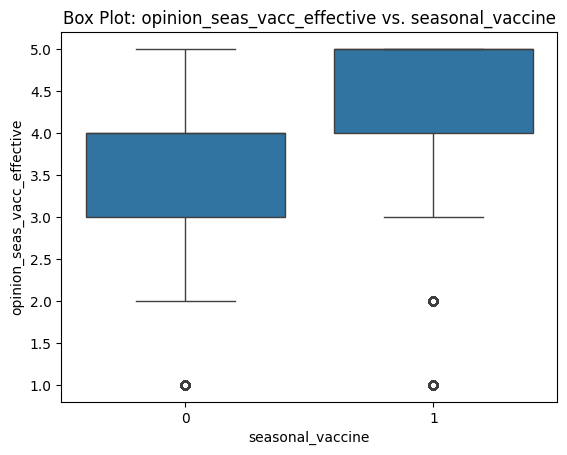

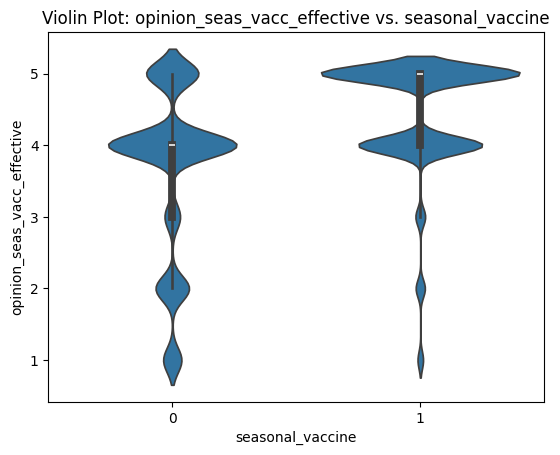

In [59]:
var1 = 'opinion_seas_vacc_effective'
var2 = 'seasonal_vaccine'

sns.boxplot(x=var2, y=var1, data=df)
plt.title(f'Box Plot: {var1} vs. {var2}')
plt.show()


sns.violinplot(x=var2, y=var1, data=df)
plt.title(f'Violin Plot: {var1} vs. {var2}')
plt.show()

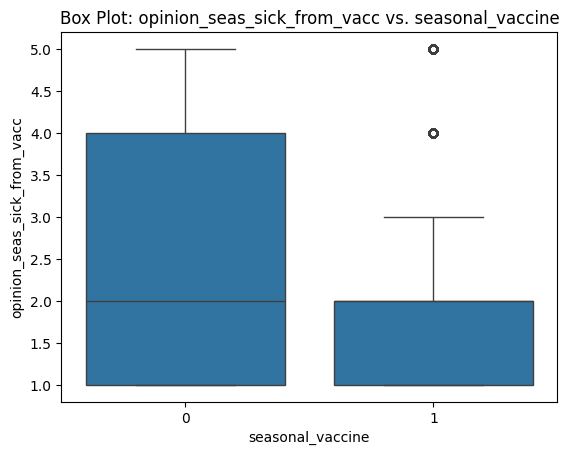

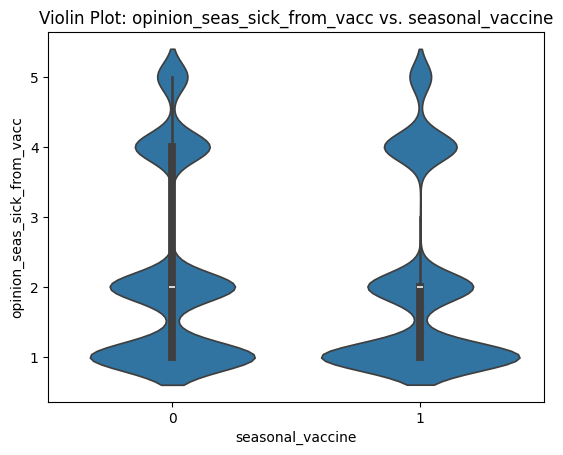

In [60]:
var1 = 'opinion_seas_sick_from_vacc'
var2 = 'seasonal_vaccine'

sns.boxplot(x=var2, y=var1, data=df)
plt.title(f'Box Plot: {var1} vs. {var2}')
plt.show()


sns.violinplot(x=var2, y=var1, data=df)
plt.title(f'Violin Plot: {var1} vs. {var2}')
plt.show()
